## Step 1: Load the libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Step 2: Load the data

In [44]:
data = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [45]:
data.shape

(4340, 8)

## Observations:

1. selling_price is the target(dependent variable in the data

## Step 3: Data Cleaning, Data Wrangling and Data Preprocessing

In [46]:
## Check the missing values per column in the data

data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

<Axes: >

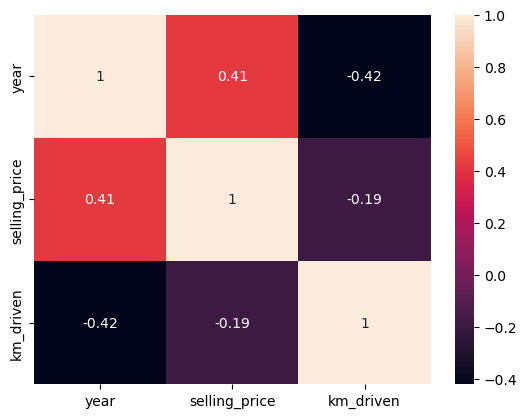

In [47]:
## Check for the relation between target and independent plus also the problem of multicolinearity

sns.heatmap(data.corr(), annot = True)

## Observations:

1. fuel, seller type, transmission and owner are text data hence perform feature encoding on these columns
2. name variable is difficult to clean hence we can drop the data

Assignment: Try to extract the car company from the name plus extract the model names(like creta, i20 etc.)

In [48]:
data = data.drop('name', axis = 1)
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [49]:
dic = {'First Owner' : 1, 'Second Owner' : 2, 'Fourth & Above Owner' : 4, 'Third Owner' : 3, 'Test Drive Car' : 0}
data['owner'] = data['owner'].replace(dic)

In [50]:
data_ohe = pd.get_dummies(data[['fuel', 'seller_type','transmission']])
data_ohe

,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,0,0,0,0,1,0,1,0,0,1
1,0,0,0,0,1,0,1,0,0,1
2,0,1,0,0,0,0,1,0,0,1
3,0,0,0,0,1,0,1,0,0,1
4,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
4335,0,1,0,0,0,0,1,0,0,1
4336,0,1,0,0,0,0,1,0,0,1
4337,0,0,0,0,1,0,1,0,0,1
4338,0,1,0,0,0,0,1,0,0,1


In [51]:
data = pd.concat([data, data_ohe], axis= 1)
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,2007,60000,70000,Petrol,Individual,Manual,1,0,0,0,0,1,0,1,0,0,1
1,2007,135000,50000,Petrol,Individual,Manual,1,0,0,0,0,1,0,1,0,0,1
2,2012,600000,100000,Diesel,Individual,Manual,1,0,1,0,0,0,0,1,0,0,1
3,2017,250000,46000,Petrol,Individual,Manual,1,0,0,0,0,1,0,1,0,0,1
4,2014,450000,141000,Diesel,Individual,Manual,2,0,1,0,0,0,0,1,0,0,1


In [53]:
data = data.drop(['fuel', 'seller_type', 'transmission'], axis = 1)
data.head()

,year,selling_price,km_driven,owner,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
0,2007,60000,70000,1,0,0,0,0,1,0,1,0,0,1
1,2007,135000,50000,1,0,0,0,0,1,0,1,0,0,1
2,2012,600000,100000,1,0,1,0,0,0,0,1,0,0,1
3,2017,250000,46000,1,0,0,0,0,1,0,1,0,0,1
4,2014,450000,141000,2,0,1,0,0,0,0,1,0,0,1


## Step 4: Seperate X and y

In [54]:
X = data.drop('selling_price', axis = 1)
y = data['selling_price']

## Step 5: Split the data into train and test sets

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

## Step 5: Apply Linear Regression on the train set

In [56]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [57]:
lr.fit(X_train, y_train)

LinearRegression()

## Perform Predictions on X_test

In [58]:
y_pred = lr.predict(X_test)
y_pred

array([ 427253.37279117,  506203.78692597,   76702.67222041, ...,
       1309085.48662014,  620157.29317002,  393284.83301648])

In [59]:
X_test

,year,km_driven,owner,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual
3978,2010,80000,1,0,1,0,0,0,0,1,0,0,1
1448,2019,27000,1,0,0,0,0,1,0,1,0,0,1
2664,2008,41723,2,0,0,0,0,1,0,1,0,0,1
17,2014,141000,2,0,1,0,0,0,0,1,0,0,1
1634,2016,60000,2,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119,2007,70000,2,0,0,0,0,1,0,1,0,0,1
1323,2009,100000,2,0,1,0,0,0,0,1,0,1,0
2700,2017,40000,1,0,0,0,0,1,0,1,0,1,0
3770,2015,68000,1,0,1,0,0,0,0,1,0,0,1


## Performing Evaluations

In [61]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

-0.1278902315711925

In [62]:
data = pd.read_csv('CAR DETAILS FROM CAR DEKHO.csv')
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [64]:
data['carname']=data["name"].str.split().str[0]
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,carname
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [65]:
data['modelname']=data["name"].str.split().str[1]
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,carname,modelname
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti,800
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti,Wagon
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai,Verna
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun,RediGO
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda,Amaze
